In [1]:
# Working on this - Diego #

In [2]:
import os
import re 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import seaborn as sns

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [3]:
# Downloaded listings.csv from Inside AirBNB on Saturday, December 24th #
df = pd.read_csv('listingsdec24.csv')

In [4]:
df1 = pd.read_csv('neighbourhoods.csv')

In [5]:
print(df.columns.values)

['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365'
 'number_of_reviews_ltm' 'license']


In [6]:
df.describe

<bound method NDFrame.describe of                        id                                          name  \
0                  106332              Lovely large room, Bethnal Green   
1                   13913           Holiday London DB Room Let-on going   
2                  284532           COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  107048          A Luxury Studio Suite in Clerkenwell   
4                  284603           Notting Hill church stay in Heaven!   
...                   ...                                           ...   
69346             9671724            Cozy room in Greenwich, river view   
69347            20277958                        River view Tate Modern   
69348            20512703  Luxury 4 bed house, 100m to river and palace   
69349            49698549                       Waterfront Hampton Stay   
69350  554172169432589107  GuestReady Gorgeous Bright 2 Br Apartment in   

         host_id       host_name  neighbourhood_group           n

In [7]:
to_drop = ['license']
df.drop(to_drop, inplace=True, axis = 1)

In [8]:
df.head

<bound method NDFrame.head of                        id                                          name  \
0                  106332              Lovely large room, Bethnal Green   
1                   13913           Holiday London DB Room Let-on going   
2                  284532           COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  107048          A Luxury Studio Suite in Clerkenwell   
4                  284603           Notting Hill church stay in Heaven!   
...                   ...                                           ...   
69346             9671724            Cozy room in Greenwich, river view   
69347            20277958                        River view Tate Modern   
69348            20512703  Luxury 4 bed house, 100m to river and palace   
69349            49698549                       Waterfront Hampton Stay   
69350  554172169432589107  GuestReady Gorgeous Bright 2 Br Apartment in   

         host_id       host_name  neighbourhood_group           neigh

In [9]:
to_drop1 = ['neighbourhood_group']
df.drop(to_drop1, inplace=True, axis = 1)

In [10]:
df.head

<bound method NDFrame.head of                        id                                          name  \
0                  106332              Lovely large room, Bethnal Green   
1                   13913           Holiday London DB Room Let-on going   
2                  284532           COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  107048          A Luxury Studio Suite in Clerkenwell   
4                  284603           Notting Hill church stay in Heaven!   
...                   ...                                           ...   
69346             9671724            Cozy room in Greenwich, river view   
69347            20277958                        River view Tate Modern   
69348            20512703  Luxury 4 bed house, 100m to river and palace   
69349            49698549                       Waterfront Hampton Stay   
69350  554172169432589107  GuestReady Gorgeous Bright 2 Br Apartment in   

         host_id       host_name           neighbourhood  latitude  l

In [11]:
dfchlc = df["calculated_host_listings_count"].mean()
print(dfchlc)

11.987498377817191


In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood                   69351 non-null  object 
 5   latitude                        69351 non-null  float64
 6   longitude                       69351 non-null  float64
 7   room_type                       69351 non-null  object 
 8   price                           69351 non-null  int64  
 9   minimum_nights                  69351 non-null  int64  
 10  number_of_reviews               69351 non-null  int64  
 11  last_review                     52571 non-null  object 
 12  reviews_per_month               

In [13]:
print(df.columns.to_list())

['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']


In [14]:
cols = ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']  

In [15]:
df.sample(3)

id                                           name  \
66049  691089916322128749       Modern 1-bedroom apartment in Kensington   
32588            31840409  Luxury Two Bedroom Flat backing onto the Park   
25797            24400782                               Studio Apartment   

         host_id             host_name           neighbourhood   latitude  \
66049  346768607                   Mia  Hammersmith and Fulham  51.498194   
32588   52514797                 Clare  Hammersmith and Fulham  51.478440   
25797  122159313  The Lion & Key Hotel          Waltham Forest  51.563570   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
66049  -0.212634  Entire home/apt    147               2                  1   
32588  -0.195650  Entire home/apt    311               1                 57   
25797  -0.012080     Private room    294               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
66049  2022-08-26               1.00                               1   
32588  2022-07-25               1.34                               4   
25797         NaN                NaN                               9   

       availability_365  number_of_reviews_ltm  
66049                 5                      1  
32588               294                     36  
25797               365                      0

In [16]:
chlc_htl = df.sort_values(by = 'calculated_host_listings_count', ascending=False)

In [17]:
print(chlc_htl, df.sample(3))

             id                                               name    host_id  \
26578  25243154        NEW Cosy 2BD Flat in the Heart of Wimbledon   28820321   
30707  29654010  NEW Fantastic Modern 1 Bedroom Flat Holloway Road   28820321   
48880  50407371    NEW 1 Bedroom Flat in the Heart of East London!   28820321   
40465  40233166     NEW 2BD East London Garden Flat South Woodford   28820321   
19009  19487983     New Exclusive Two Bedroom Flat Centre Chelsea!   28820321   
...         ...                                                ...        ...   
26506  25154667   Stunning Double Room near City & Regent's Canal.    4093276   
26507  25310847              Beautiful 3 Bed House- Fulham, London  191172845   
26508  25155551    Private double bedroom and bathroom, Wandsworth   14390361   
26511  25218668                                       Family House  190546055   
34675  34172940                            Double room in Shadwell  210738176   

       host_name           

In [18]:
df.head

<bound method NDFrame.head of                        id                                          name  \
0                  106332              Lovely large room, Bethnal Green   
1                   13913           Holiday London DB Room Let-on going   
2                  284532           COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  107048          A Luxury Studio Suite in Clerkenwell   
4                  284603           Notting Hill church stay in Heaven!   
...                   ...                                           ...   
69346             9671724            Cozy room in Greenwich, river view   
69347            20277958                        River view Tate Modern   
69348            20512703  Luxury 4 bed house, 100m to river and palace   
69349            49698549                       Waterfront Hampton Stay   
69350  554172169432589107  GuestReady Gorgeous Bright 2 Br Apartment in   

         host_id       host_name           neighbourhood  latitude  l

In [19]:
df.sample.chlc_htl

AttributeError: 'function' object has no attribute 'chlc_htl'

In [20]:
print(chlc_htl)

             id                                               name    host_id  \
26578  25243154        NEW Cosy 2BD Flat in the Heart of Wimbledon   28820321   
30707  29654010  NEW Fantastic Modern 1 Bedroom Flat Holloway Road   28820321   
48880  50407371    NEW 1 Bedroom Flat in the Heart of East London!   28820321   
40465  40233166     NEW 2BD East London Garden Flat South Woodford   28820321   
19009  19487983     New Exclusive Two Bedroom Flat Centre Chelsea!   28820321   
...         ...                                                ...        ...   
26506  25154667   Stunning Double Room near City & Regent's Canal.    4093276   
26507  25310847              Beautiful 3 Bed House- Fulham, London  191172845   
26508  25155551    Private double bedroom and bathroom, Wandsworth   14390361   
26511  25218668                                       Family House  190546055   
34675  34172940                            Double room in Shadwell  210738176   

       host_name           

In [21]:
print (df1.columns.values)

['neighbourhood_group' 'neighbourhood']


In [22]:
df1.sample(3)

neighbourhood_group neighbourhood
3                   NaN         Brent
27                  NaN     Southwark
17                  NaN      Hounslow

In [23]:
df2 = pd.read_csv('lsoa-data-old-boundaries.csv')

/tmp/ipykernel_107/4032804503.py:1: DtypeWarning: Columns (2,14,26,38,50,62,74,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,143,145,147,148,149,150,151,152,153,154,157,158,159,160,163,164,165,166,167,170,171,172,173,174,177,178,179,180,181,184,185,186,187,188,191,192,193,194,195,198,199,200,207,208,209) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('lsoa-data-old-boundaries.csv')


In [24]:
df2.sample(3)

Unnamed: 0      Unnamed: 1 Mid-year Population Estimates  Unnamed: 3  \
3110  E01003109    Lambeth 003E                          1503      1620.0   
3290  E01003289   Lewisham 012B                          2161      2191.0   
3791  E01003790  Redbridge 027A                          1408      1440.0   

      Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
3110      1668.0      1743.0      1792.0      1818.0      1917.0      1974.0   
3290      2186.0      2188.0      2212.0      2333.0      2516.0      2610.0   
3791      1429.0      1433.0      1426.0      1424.0      1423.0      1475.0   

      ...  Unnamed: 200  Unnamed: 201  Unnamed: 202  Unnamed: 203  \
3110  ...           5.6           5.5           5.4           5.3   
3290  ...           0.1           0.1           0.1           0.1   
3791  ...           0.9           0.0           0.0           0.0   

     Unnamed: 204  Unnamed: 205  Unnamed: 206  House Prices (2012)  \
3110          5.0           4.9           4.7               447119   
3290          0.1           0.1           0.1               272965   
3791          0.0           0.0           0.0               451875   

      Unnamed: 208  Unnamed: 209  
3110            29           2.4  
3290            27           2.1  
3791            12           2.1  

[3 rows x 210 columns]

<AxesSubplot:>

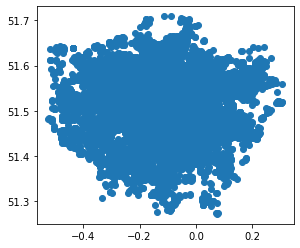

In [25]:
gdf = gpd.GeoDataFrame(df,
            geometry = gpd.points_from_xy(
                        df['longitude'], 
                        df['latitude'], 
                        crs='epsg:4326'
            )
      )
gdf.plot()

<AxesSubplot:>

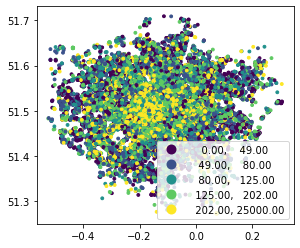

In [26]:
gdf.plot(column='price', cmap='viridis', 
         scheme='quantiles', markersize=8, legend=True)

In [33]:
# Trying to do Herfindahl_Hirschmann Index to see how some hosts might hold larger shares of the market
def hhi(series):
    _, cnt = np.unique(series, return_counts=True)
    return np.square(cnt/cnt.sum()).sum()    

new_df = df.groupby('host_name').agg({'host_id': 'count', 'calculated_host_listings_count': hhi})
print(new_df)

                          host_id  calculated_host_listings_count
host_name                                                        
'Cassie                         1                        1.000000
'Connor                         2                        1.000000
'Damz                           1                        1.000000
(Email hidden by Airbnb)       14                        0.755102
(Please                         1                        1.000000
...                           ...                             ...
英杰                              1                        1.000000
认证手机用户5528                      1                        1.000000
鏵萱                              1                        1.000000
霞                               1                        1.000000
현석                              1                        1.000000

[13043 rows x 2 columns]


In [34]:
new_df.sample(10)
# Don't think I'm doing this correctly

host_id  calculated_host_listings_count
host_name                                                  
Annely                    5                        1.000000
Jacinta                   3                        0.555556
Phil And Genevieve        1                        1.000000
Mayda                     1                        1.000000
Qandeel                   1                        1.000000
Ewuradjoa                 1                        1.000000
Georg                     3                        1.000000
Siena                     1                        1.000000
Ruhy                      3                        1.000000
Akihiro                   1                        1.000000

In [ ]:
# Going to try to get shares doing calculated_host_listings divided by total count

